In [13]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

In [14]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-77.2146212940853, 145.81258279355376),
 (-37.801344107226974, -1.5193523244095672),
 (65.8086958753293, -83.48111290479181),
 (39.21398769722529, 125.47360047148584),
 (68.9542777557945, -37.847300832523956),
 (-67.20727724341982, -54.736983729567726),
 (-0.5914126865993836, 86.84701144550081),
 (32.1178833102456, 44.351222552336395),
 (9.930715171289222, 38.648360341908585),
 (-65.43767684992858, -116.79936779533202),
 (-65.46404454875378, 12.232308611733004),
 (24.378904870208572, -179.6656003532212),
 (47.72939757850145, 47.97981656974778),
 (-19.904499756327496, 67.57165674584044),
 (-4.093950163488003, -143.99937902849024),
 (-11.070564924349554, 60.5776153986576),
 (48.06272263144476, 48.45096057657051),
 (41.14115757405099, 52.30755850985324),
 (-45.486930140789134, 36.31392154646406),
 (52.9411514546735, -80.91145169638351),
 (-65.77604803211754, 165.01714049138883),
 (59.07066561024993, 157.0707820823519),
 (81.3446522061175, -75.46566189318472),
 (-66.826426123931, 154.765

In [16]:
# Use the citipy module to determine city based on latitude and longitude 
from citipy import citipy

In [17]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

625

In [20]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e2d80365a53e83073e2f4f688fca4a6


In [21]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind, 
                          "Country": city_country, 
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | dandong
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | baghdad
Processing Record 9 of Set 1 | fiche
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | tambovka
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | artyom
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tigil
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 

Processing Record 38 of Set 3 | praia
Processing Record 39 of Set 3 | turukhansk
Processing Record 40 of Set 3 | storsteinnes
Processing Record 41 of Set 3 | odweyne
Processing Record 42 of Set 3 | cherskiy
Processing Record 43 of Set 3 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 3 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 3 | caiaponia
Processing Record 46 of Set 3 | kupang
Processing Record 47 of Set 3 | tonota
Processing Record 48 of Set 3 | san cristobal
Processing Record 49 of Set 3 | meyungs
City not found. Skipping...
Processing Record 50 of Set 3 | tadine
Processing Record 1 of Set 4 | tigzirt
Processing Record 2 of Set 4 | chernyshevskiy
Processing Record 3 of Set 4 | motygino
Processing Record 4 of Set 4 | lompoc
Processing Record 5 of Set 4 | bereda
Processing Record 6 of Set 4 | hasaki
Processing Record 7 of Set 4 | guzelyurt
Processing Record 8 of Set 4 | high level
Processing Record 9 of Set 4 | goundam
Processi

Processing Record 31 of Set 7 | tezu
Processing Record 32 of Set 7 | uyemskiy
Processing Record 33 of Set 7 | matara
Processing Record 34 of Set 7 | paamiut
Processing Record 35 of Set 7 | kamenka
Processing Record 36 of Set 7 | hualmay
Processing Record 37 of Set 7 | los llanos de aridane
Processing Record 38 of Set 7 | barbastro
Processing Record 39 of Set 7 | hamilton
Processing Record 40 of Set 7 | biskamzha
Processing Record 41 of Set 7 | mukhen
Processing Record 42 of Set 7 | touros
Processing Record 43 of Set 7 | maceio
Processing Record 44 of Set 7 | chicama
Processing Record 45 of Set 7 | pakxe
Processing Record 46 of Set 7 | el dorado
Processing Record 47 of Set 7 | beringovskiy
Processing Record 48 of Set 7 | sao paulo de olivenca
Processing Record 49 of Set 7 | mwanza
Processing Record 50 of Set 7 | vardo
Processing Record 1 of Set 8 | bolotnoye
Processing Record 2 of Set 8 | marrakesh
Processing Record 3 of Set 8 | viedma
Processing Record 4 of Set 8 | kokkola
Processing R

Processing Record 19 of Set 11 | sin-le-noble
Processing Record 20 of Set 11 | ludza
Processing Record 21 of Set 11 | alta floresta
Processing Record 22 of Set 11 | teya
Processing Record 23 of Set 11 | te anau
Processing Record 24 of Set 11 | presidencia roque saenz pena
Processing Record 25 of Set 11 | sousa
Processing Record 26 of Set 11 | nago
Processing Record 27 of Set 11 | kinablangan
Processing Record 28 of Set 11 | honningsvag
Processing Record 29 of Set 11 | lazaro cardenas
Processing Record 30 of Set 11 | umzimvubu
City not found. Skipping...
Processing Record 31 of Set 11 | tsihombe
City not found. Skipping...
Processing Record 32 of Set 11 | progreso
Processing Record 33 of Set 11 | sinnamary
Processing Record 34 of Set 11 | parrita
Processing Record 35 of Set 11 | tura
Processing Record 36 of Set 11 | hun
Processing Record 37 of Set 11 | russell
Processing Record 38 of Set 11 | santa rosa
Processing Record 39 of Set 11 | shelburne
Processing Record 40 of Set 11 | colac
Pr

In [35]:
len(city_data)

578

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,60.12,98,90,3.00,AU,2021-10-01 01:00:32
1,Saldanha,-33.0117,17.9442,57.61,90,0,11.12,ZA,2021-10-01 01:00:32
2,Dandong,40.1292,124.3947,65.03,77,4,6.22,CN,2021-10-01 01:00:32
3,Tasiilaq,65.6145,-37.6368,35.76,87,8,5.01,GL,2021-10-01 01:00:33
4,Ushuaia,-54.8000,-68.3000,42.46,56,20,18.41,AR,2021-10-01 00:58:46
5,Hambantota,6.1241,81.1185,79.14,94,75,4.61,LK,2021-10-01 01:00:33
6,Baghdad,33.3406,44.4009,80.51,32,0,8.05,IQ,2021-10-01 00:56:39
7,Fiche,9.8000,38.7333,48.72,68,93,2.57,ET,2021-10-01 01:00:34
8,Rikitea,-23.1203,-134.9692,73.31,73,10,16.51,PF,2021-10-01 01:00:35
9,Hermanus,-34.4187,19.2345,56.89,87,97,8.43,ZA,2021-10-01 01:00:35


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-10-01 01:00:32,-42.8794,147.3294,60.12,98,90,3.00
1,Saldanha,ZA,2021-10-01 01:00:32,-33.0117,17.9442,57.61,90,0,11.12
2,Dandong,CN,2021-10-01 01:00:32,40.1292,124.3947,65.03,77,4,6.22
3,Tasiilaq,GL,2021-10-01 01:00:33,65.6145,-37.6368,35.76,87,8,5.01
4,Ushuaia,AR,2021-10-01 00:58:46,-54.8000,-68.3000,42.46,56,20,18.41
...,...,...,...,...,...,...,...,...,...
573,Vallenar,CL,2021-10-01 01:04:10,-28.5708,-70.7581,64.54,33,0,0.92
574,Fergus Falls,US,2021-10-01 01:00:07,46.2830,-96.0776,70.52,86,40,4.00
575,Petukhovo,RU,2021-10-01 01:04:10,55.0692,67.9019,34.36,62,100,11.61
576,Tomatlan,MX,2021-10-01 01:04:10,19.9333,-105.2500,77.94,88,100,0.04


In [38]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

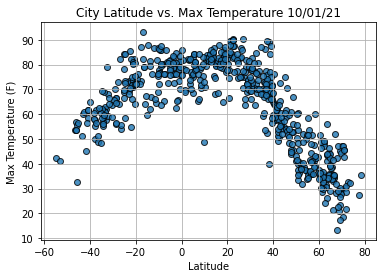

In [40]:
# Import time module
import time 

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

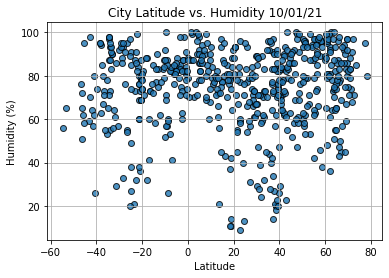

In [41]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

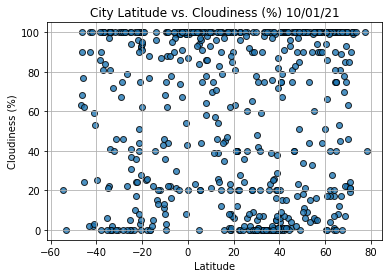

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

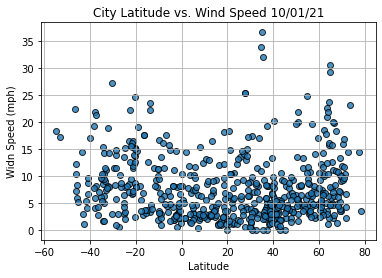

In [43]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Widn Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [46]:
# import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2021-10-01 01:00:03
Lat                       22.2855
Lng                      114.1577
Max Temp                    90.25
Humidity                       81
Cloudiness                      0
Wind Speed                   1.01
Name: 13, dtype: object

In [48]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
573    False
574     True
575     True
576     True
577    False
Name: Lat, Length: 578, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Dandong,CN,2021-10-01 01:00:32,40.1292,124.3947,65.03,77,4,6.22
3,Tasiilaq,GL,2021-10-01 01:00:33,65.6145,-37.6368,35.76,87,8,5.01
5,Hambantota,LK,2021-10-01 01:00:33,6.1241,81.1185,79.14,94,75,4.61
6,Baghdad,IQ,2021-10-01 00:56:39,33.3406,44.4009,80.51,32,0,8.05
7,Fiche,ET,2021-10-01 01:00:34,9.8000,38.7333,48.72,68,93,2.57


In [52]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

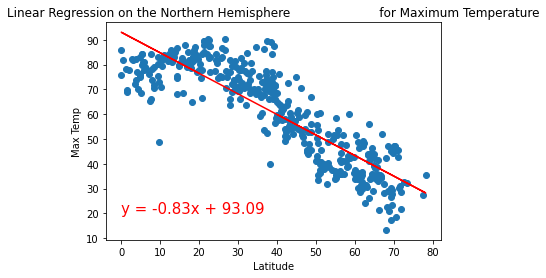

In [55]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(0,20))

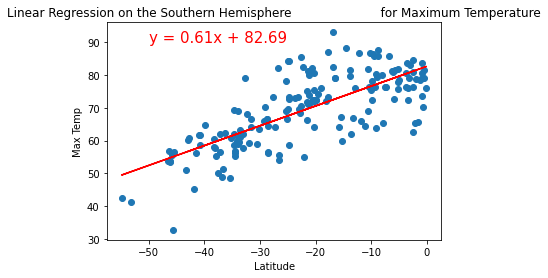

In [56]:
# Linear regression on the Northern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(-50,90))

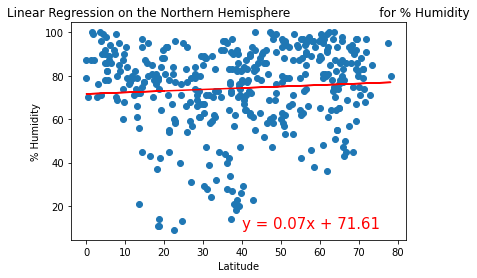

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

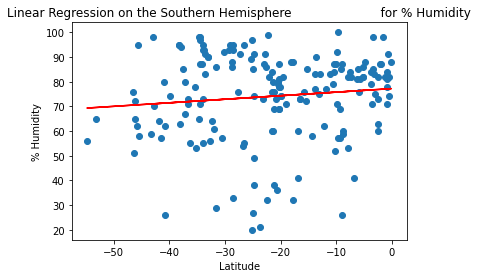

In [61]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))

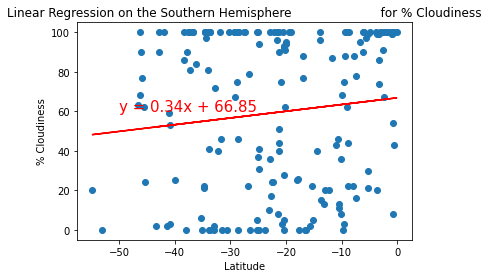

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(-50,60))

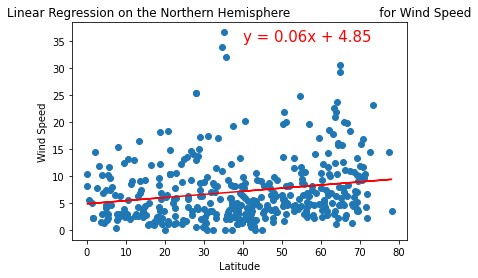

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(40,35))

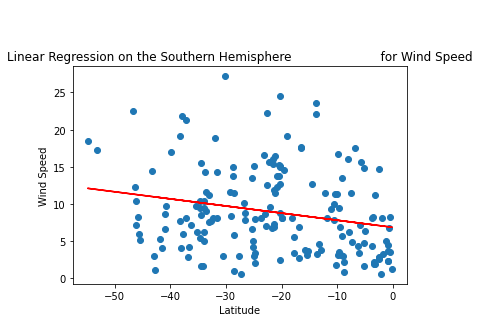

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,35))